In [ ]:

#### IMPORTING LIBRARIES...

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## **Datasets**

In [ ]:
transform = transforms.ToTensor()
train_data = datasets.CIFAR10(root = '/content/', train = True, transform=transform, download = True)
test_data = datasets.CIFAR10(root = '/content/', train = False, transform=transform, download = True)

Extracting /content/cifar-10-python.tar.gz to /content/
Files already downloaded and verified


## **Data Distributor**

In [ ]:
torch.manual_seed(30)
train_loader  = DataLoader(dataset = train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(dataset=test_data, batch_size=10, shuffle = False)

## **Sample images**

In [ ]:
def classes_sample(classes):
  pred_cls = []
  for cls in (classes):
    labels = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    pred_cls.append(labels[cls])
  return (pred_cls)        

The shape of first train batch is:  torch.Size([10, 3, 32, 32])
The shape of first test batch is:  torch.Size([10])
predicted classes are:  ['bird', 'ship', 'horse', 'frog', 'ship', 'car', 'cat', 'horse', 'horse', 'deer']


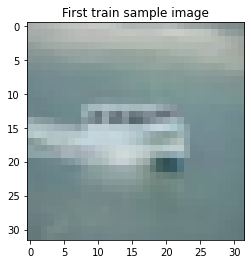

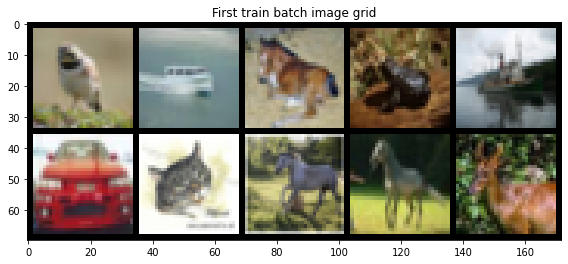

In [ ]:
for images, classes in (train_loader):
  break

im_train_sample = images
im_classes_sample = classes

print("The shape of first train batch is: ", im_train_sample.shape)
print("The shape of first test batch is: ", im_classes_sample.shape)

plt.figure(figsize = (8,4))
plt.title("First train sample image")
plt.imshow(np.transpose(im_train_sample[1].numpy(), (1,2,0)))

plt.figure(figsize=(10,4))
plt.title("First train batch image grid")
im_grid = make_grid(im_train_sample, nrow = 5).numpy()

print("predicted classes are: ", classes_sample(im_classes_sample))
plt.imshow(np.transpose(im_grid, (1,2,0)));

## **Defining Neural Network**

In [ ]:
class CNN_model_1(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(3, 6, 5, 1)             
    self.conv2 = nn.Conv2d(6,16, 3, 1)
    self.pool = nn.MaxPool2d(kernel_size=(2,2), stride = 2)
    self.fc1 = nn.Linear(6*6*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84,10)

    torch.nn.init.kaiming_uniform_(self.conv1.weight)
    torch.nn.init.zeros_(self.conv1.bias)
    torch.nn.init.kaiming_uniform_(self.conv2.weight)
    torch.nn.init.zeros_(self.conv2.bias)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))          #(reduces to (30,30,6))
#### MAX POOLING....                              #reduces to(15,15,6)
    x = self.pool(F.relu(self.conv2(x)))          # reduces to (13,13,16)
#### MAX POOLING....                              # reduces to (6,6,16)
    x = x.view(-1, 6*6*16)
    x = F.relu(self.fc1(x))
    x =  F.relu(self.fc2(x))
    x =  self.fc3(x)

    return (F.log_softmax(x, dim=1))

In [ ]:
torch.manual_seed(30)
model = CNN_model_1()
model

CNN_model_1(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.005)

In [ ]:
def GetAccuarcy(yp, yt):
  return(accuracy_score(yt, yp))

In [ ]:
##### TRAINING....

torch.manual_seed(53)

#### SAVING ALL THE RESULTS

training_loss = []
testing_loss = []
training_accuracy = []
testing_accuracy = []
epochs = 5

for i in range(epochs):

  for iter_num, (xtrain, ytrain) in enumerate(train_loader):
    iter_num+=1
    ypred = model(xtrain)                                        #forward propagation
    train_loss = criterion(ypred, ytrain)

    predicted = torch.max(ypred.data, 1)[1]
    
    train_accuracy = GetAccuarcy(predicted, ytrain)*100
 
    optimizer.zero_grad()

    train_loss.backward()                                         # Backpropagation

    optimizer.step()

    train_accuracy = GetAccuarcy(predicted, ytrain)*100
    if (iter_num%1000 == 0):
      print("Epoch : {} | Loss: {} | Training accuracy : {}%".format(i, train_loss, train_accuracy))
  training_accuracy.append(train_accuracy)
  training_loss.append(train_loss)

#### TESTING....

with torch.no_grad():
  for iter_num, (xtest, ytest) in enumerate (test_loader):

    yval = model(xtest)                                          # testing

    predicted = torch.max(yval.data, 1)[1]
  Test_accuracy = GetAccuarcy(predicted, ytest)*100
  testing_accuracy.append(Test_accuracy)

  test_loss = criterion(yval, ytest)
  testing_loss.append(test_loss)
  print(" ///////////   TESTING ACCURACY ALL EPOCHS IS {}%\\\\\\\\\\".format(Test_accuracy))

Epoch : 0 | Loss: 1.8564647436141968 | Training accuracy : 40.0%
Epoch : 0 | Loss: 1.2773982286453247 | Training accuracy : 50.0%
Epoch : 0 | Loss: 1.8650108575820923 | Training accuracy : 50.0%
Epoch : 0 | Loss: 1.8446487188339233 | Training accuracy : 20.0%
Epoch : 0 | Loss: 1.0538933277130127 | Training accuracy : 50.0%
Epoch : 1 | Loss: 1.5878942012786865 | Training accuracy : 40.0%
Epoch : 1 | Loss: 1.9185502529144287 | Training accuracy : 30.0%
Epoch : 1 | Loss: 1.388662338256836 | Training accuracy : 60.0%
Epoch : 1 | Loss: 1.371875286102295 | Training accuracy : 40.0%
Epoch : 1 | Loss: 0.9433830976486206 | Training accuracy : 80.0%
Epoch : 2 | Loss: 1.266635775566101 | Training accuracy : 40.0%
Epoch : 2 | Loss: 1.6042579412460327 | Training accuracy : 50.0%
Epoch : 2 | Loss: 0.924071192741394 | Training accuracy : 70.0%
Epoch : 2 | Loss: 1.5910935401916504 | Training accuracy : 50.0%
Epoch : 2 | Loss: 1.5930657386779785 | Training accuracy : 30.0%
Epoch : 3 | Loss: 0.913685202

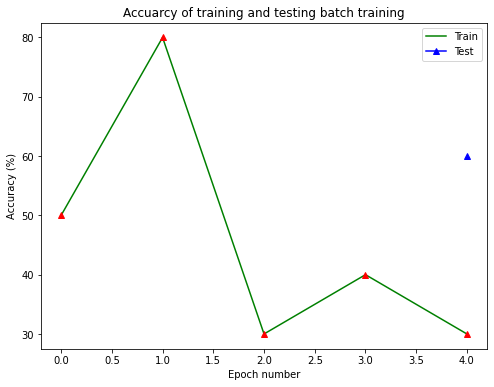

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(training_accuracy, color = 'green', label = "Train")
xm = range(len(training_accuracy))
ym = training_accuracy
for xmark, ymark in zip (xm, ym):
  plt.plot(xmark, ymark, marker = "^", color = 'red')
plt.plot(4.0, testing_accuracy, marker = "^", color = 'blue', label = 'Test')
plt.title("Accuarcy of training and testing batch training")
plt.xlabel("Epoch number")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

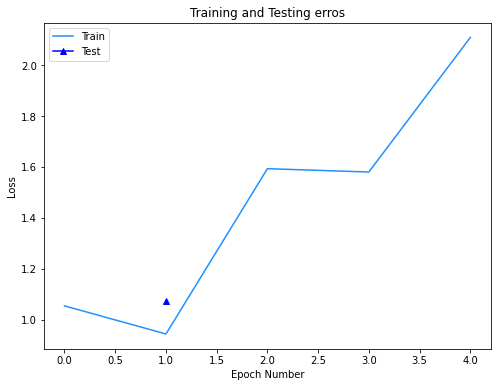

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(training_loss, color = 'dodgerblue', label = "Train")
plt.plot(len(testing_loss), testing_loss, marker = "^", color = 'blue', label = 'Test')
plt.title("Training and Testing erros")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()